In [1]:
%pylab inline

pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure"
pathchow='/home/jfm343/Documents/BM_bandstructure'
pathpc='/home/juan/Documents/Projects/BM_bandstructure'

pathy=pathMAC
path_data=pathy+'/data'
import numpy as np
import pandas as pd
import os
sys.path.insert(0, pathy+'/Mods_disp')
sys.path.insert(0, pathy+'/Mods_corr')
import Dispersion
import MoireLattice
from scipy import linalg as la
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from SCF_M_point import Mean_field_M
import pickle
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 14})
rc('text', usetex=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
Nsamp=4
theta=1.05*np.pi/180  # magic angle
c6sym=True
umkl=0 #the number of umklaps where we calculate an observable ie Pi(q), for momentum transfers we need umkl+1 umklapps when scattering from the 1bz
l=MoireLattice.MoireTriangLattice(Nsamp,theta,0,c6sym,umkl)
lq=MoireLattice.MoireTriangLattice(Nsamp,theta,2,c6sym,umkl) #this one is normalized
[q1,q2,q3]=l.q
q=np.sqrt(q1@q1)

starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.002485990524291992  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling reciprocal lattice points in momentum trans lattt
the shape of the index G array (16, 1)
starting sampling in reciprocal space....
finished sampling in reciprocal space....t= 0.0016682147979736328  s
size of q before symmetr... 16
size of q after symmetr... 19
size of q before symmetr... 16
size of q after symmetr... 19
16 1bz numer of sampling lattice points
19 1bz numer of sampling lattice points c3
19 X numer of sampling lattice points
112 Q numer of sampling lattice points
the shape of the index q array (16, 19)
1 G numer of sampling re

In [3]:
evtoK=11604.5250061598

In [4]:
fullpath=path_data+'/g4_24_2023-04-06-14-26-43/g4_24_1.05/data_mu_0_g2_4.h5'
dff24 = pd.read_hdf(fullpath)
fullpath=path_data+'/g4_12_2023-04-06-14-06-29/g4_12_1.05/data_mu_0_g2_4.h5'
dff12 = pd.read_hdf(fullpath)
fullpath=path_data+'/g4_6_2023-04-06-14-12-07/g4_6_1.05/data_mu_0_g2_4.h5'
dff6 = pd.read_hdf(fullpath)



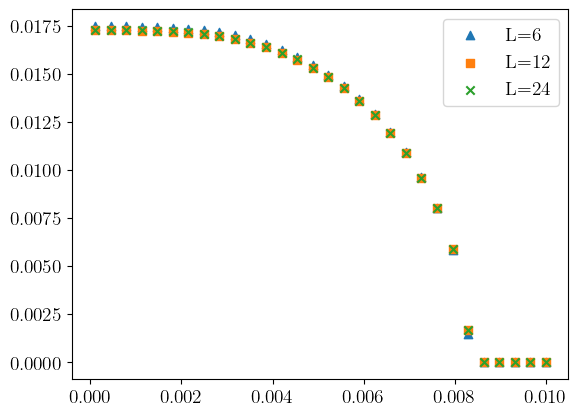

In [5]:

plt.scatter(dff6['T'], dff6['D'], marker='^', label='L=6')
plt.scatter(dff12['T'], dff12['D'], marker='s', label='L=12')
plt.scatter(dff24['T'], dff24['D'], marker='x', label='L=24')
plt.legend()

In [6]:
fullpath=path_data+'/g3_12_2023-04-06-14-34-59/g3_12_1.05/data_mu_0_g2_3.h5'
dff3 = pd.read_hdf(fullpath)
fullpath=path_data+'/g2_12_2023-04-06-14-36-03/g2_12_1.05/data_mu_0_g2_2.h5'
dff2 = pd.read_hdf(fullpath)
fullpath=path_data+'/g1_12_2023-04-07-11-51-04/g1_12_1.05/data_mu_0_g2_1.h5'
# fullpath=path_data+'/g1_12_2023-04-06-17-18-19/g1_12_1.05/data_mu_0_g2_1.h5'

dff1 = pd.read_hdf(fullpath)

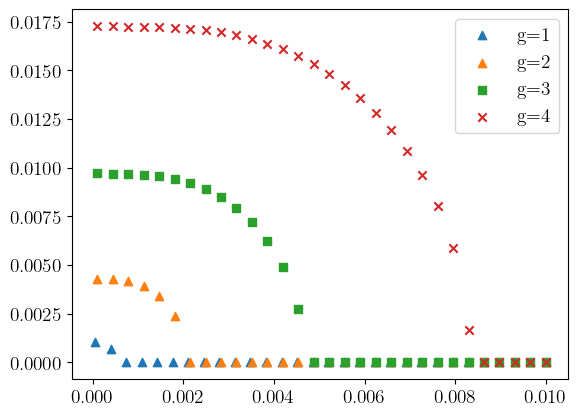

In [7]:
plt.scatter(dff1['T'], dff1['D'], marker='^', label='g=1')
plt.scatter(dff2['T'], dff2['D'], marker='^', label='g=2')
plt.scatter(dff3['T'], dff3['D'], marker='s', label='g=3')
plt.scatter(dff12['T'], dff12['D'], marker='x', label='g=4')
plt.legend()

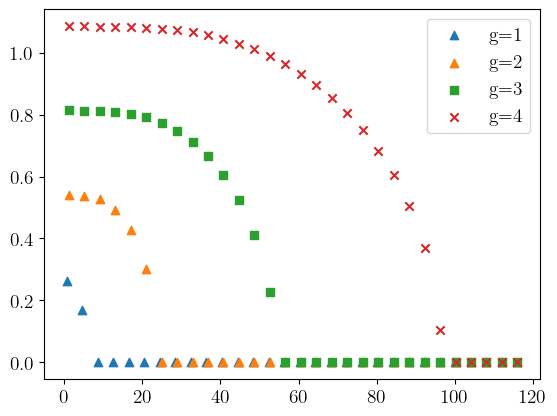

In [8]:
plt.scatter(evtoK*dff1['T'], np.array(dff1['D'])/(np.array(dff1['bet'])*q), marker='^', label='g=1')
plt.scatter(evtoK*dff2['T'], np.array(dff2['D'])/(np.array(dff2['bet'])*q), marker='^', label='g=2')
plt.scatter(evtoK*dff3['T'], np.array(dff3['D'])/(np.array(dff3['bet'])*q), marker='s', label='g=3')
plt.scatter(evtoK*dff12['T'], np.array(dff12['D'])/(np.array(dff12['bet'])*q), marker='x', label='g=4')
plt.legend()

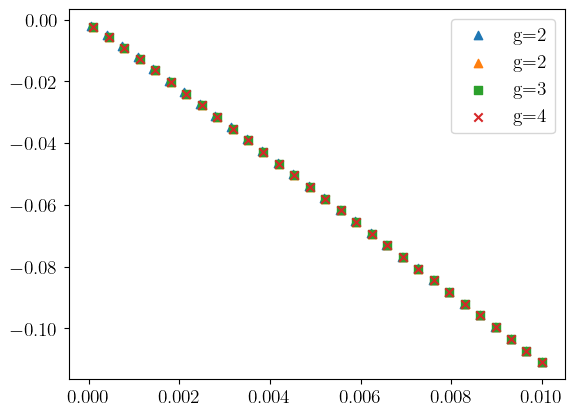

In [9]:
plt.scatter(dff1['T'], dff1['F0'], marker='^', label='g=2')
plt.scatter(dff2['T'], dff2['F0'], marker='^', label='g=2')
plt.scatter(dff3['T'], dff3['F0'], marker='s', label='g=3')
plt.scatter(dff12['T'], dff12['F0'], marker='x', label='g=4')
plt.legend()



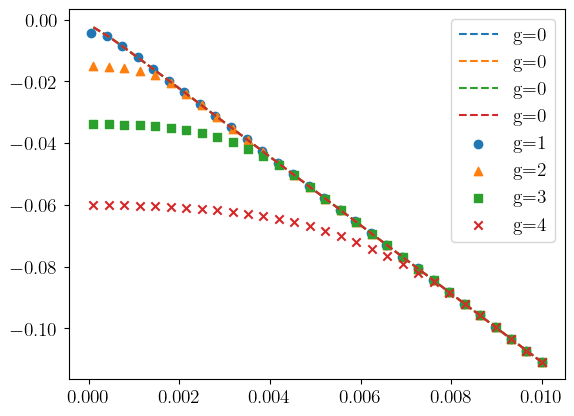

In [10]:
plt.plot(dff1['T'], dff1['F0'], ls='--' , label='g=0')
plt.plot(dff2['T'], dff2['F0'], ls='--' , label='g=0')
plt.plot(dff3['T'], dff3['F0'], ls='--', label='g=0')
plt.plot(dff12['T'], dff12['F0'], ls='--', label='g=0')
# plt.legend()
plt.scatter(dff1['T'], dff1['FSC'], marker='o', label='g=1')
plt.scatter(dff2['T'], dff2['FSC'], marker='^', label='g=2')
plt.scatter(dff3['T'], dff3['FSC'], marker='s', label='g=3')
plt.scatter(dff12['T'], dff12['FSC'], marker='x', label='g=4')
plt.legend()

In [11]:
np.array(dff1['bet'])*q*4

array([0.0159153, 0.0159153, 0.0159153, 0.0159153, 0.0159153, 0.0159153,
       0.0159153, 0.0159153, 0.0159153, 0.0159153, 0.0159153, 0.0159153,
       0.0159153, 0.0159153, 0.0159153, 0.0159153, 0.0159153, 0.0159153,
       0.0159153, 0.0159153, 0.0159153, 0.0159153, 0.0159153, 0.0159153,
       0.0159153, 0.0159153, 0.0159153, 0.0159153, 0.0159153, 0.0159153])

In [12]:
fullpath=path_data+'/g1_12_2023-04-07-11-51-04/g1_12_1.05/data_mu_0_g2_1.pkl'
# Read the object from the pickle file
with open(fullpath, 'rb') as file:
    B1 = pickle.load(file)


In [13]:
[Eval_plus,Eval_min]=B1.precompute_E_MBZ( args=(np.array(dff1['D'])[-2],0.0,0.0))
df_disp1=pd.DataFrame({'kx': B1.latt.KX, 'ky': B1.latt.KY, 'dp0': Eval_plus[:,0], 'dp1': Eval_plus[:,1], 'dp2': Eval_plus[:,2], 'dp3': Eval_plus[:,3],'dm0': Eval_min[:,0],'dm1': Eval_min[:,1],'dm2': Eval_min[:,2],'dm3': Eval_min[:,3],'phi' :np.array(dff12['D'])[-1]*np.ones(B1.latt.Npoi) })



starting Disp.......
time for Disp... 0.009763002395629883


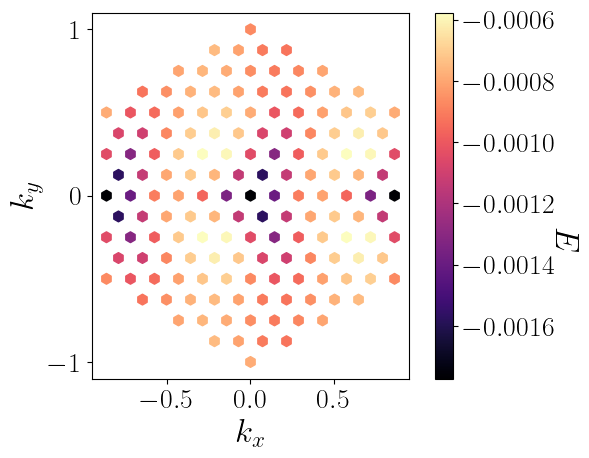

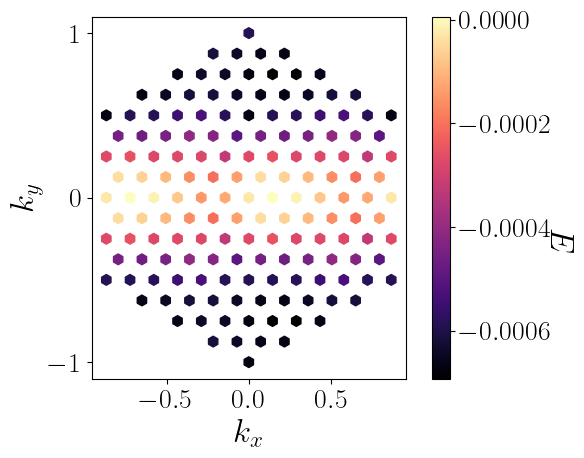

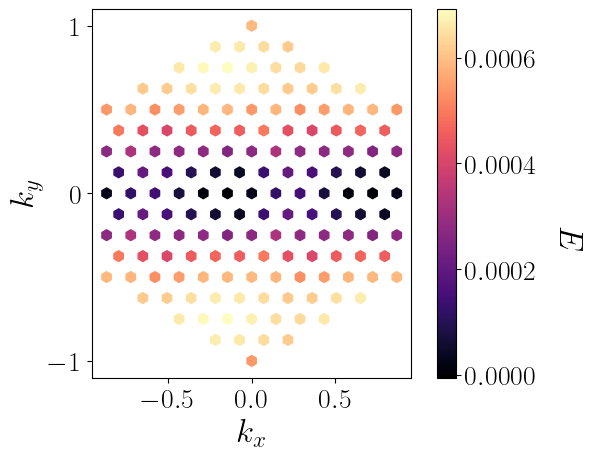

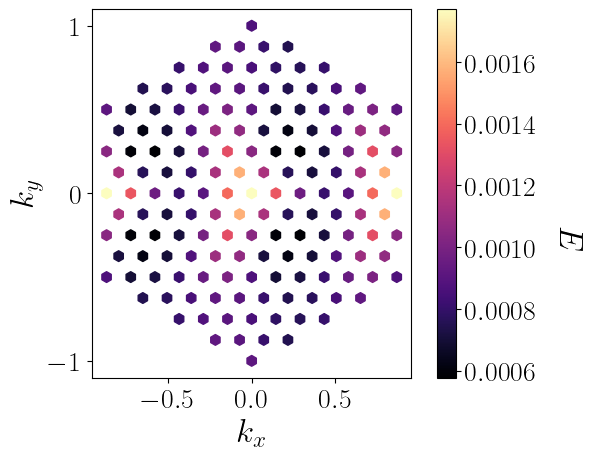

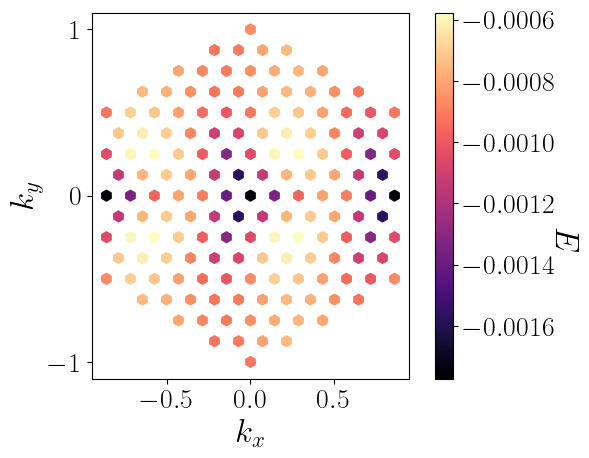

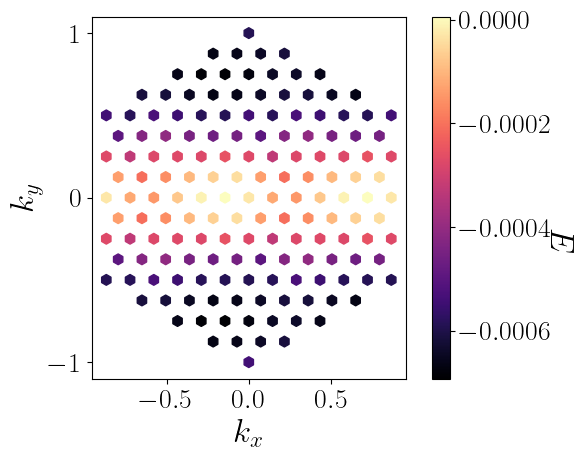

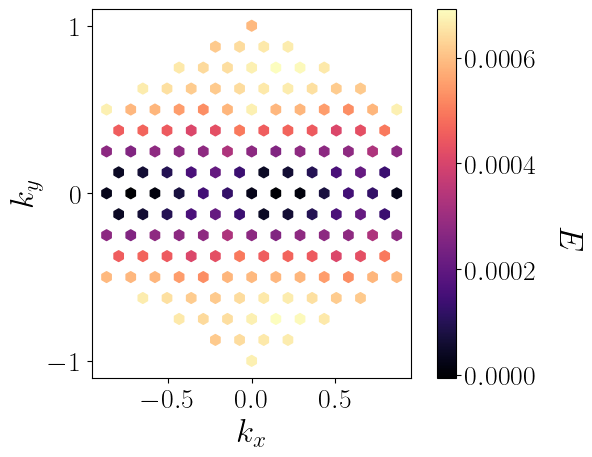

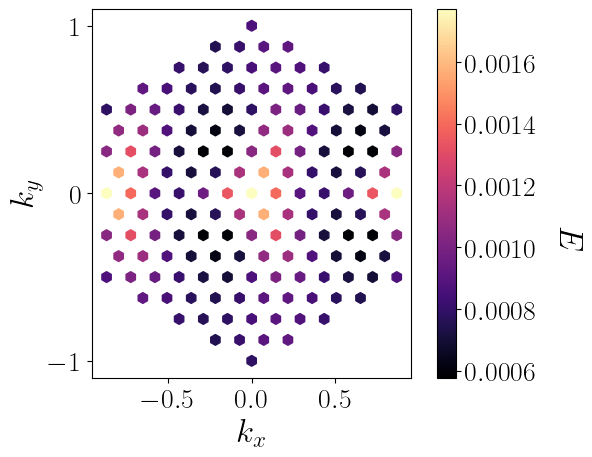

In [14]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    
    d1 = data.loc[:,args[0]]
    d2 = data.loc[:,args[1]]
    d3 = data.loc[:,args[2]]
    color_map = plt.cm.get_cmap('magma')
    
    # [KXc3z,KYc3z, Indc3z]=B1.latt.C3zLatt(d1,d2)
    # im=plt.scatter(d1,d2 ,c=d3[Indc3z[np.array(Indc3z, dtype=int)]],s=50, cmap=color_map, marker='h')
    # im=plt.scatter(d1,d2 ,c=d3[Indc3z],s=25, cmap=color_map, marker='h')
    im=plt.scatter(d1,d2 ,c=d3,s=60, cmap=color_map, marker='h')
    
    plt.xlabel(r'$k_x$', size=24)
    plt.ylabel(r'$k_y$', size=24)
    
    plt.xticks( size=20)
    plt.yticks( size=20)
    plt.text(1.8,-0.3,r'$E$', size=24, rotation=270) # npt [meV]
    
    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=4)

    cbar = plt.colorbar(im)
    tick_font_size = 20
    cbar.ax.tick_params(labelsize=tick_font_size)
    plt.gca().set_aspect('equal')
    plt.tight_layout()

    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)

draw_heatmap( 'kx', 'ky', 'dm0',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dm1',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dm2',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dm3',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dp0',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dp1',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dp2',data=df_disp1)
plt.show()

draw_heatmap( 'kx', 'ky', 'dp3',data=df_disp1)
plt.show()

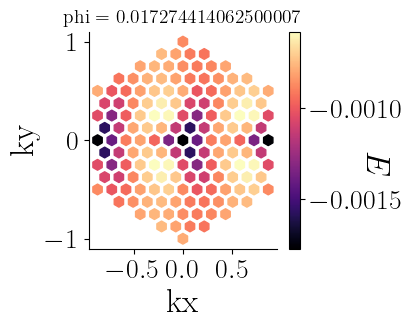

In [15]:
# np.random.seed(0)
# indices = pd.MultiIndex.from_product((range(5), range(5), range(5)),
#  names=('label0', 'label1', 'label2'))
# data = pd.DataFrame(np.random.uniform(0, 100, size=len(indices)),
#  index=indices, columns=('value',)).reset_index()

def draw_path(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    d5 = np.array(data.loc[:,args[4]])
    d6 = np.array(data.loc[:,args[5]])
    d7 = np.array(data.loc[:,args[2]])
    d8 = np.array(data.loc[:,args[3]])
    d9 = np.array(data.loc[:,args[4]])
    d10 = np.array(data.loc[:,args[5]])
    
    [path,kpath,HSP_index]=B1.latt.embedded_High_symmetry_path(d1,d2)
    pth=np.arange(np.size(path))
    plt.plot(d3[path], c='b')
    plt.plot(d4[path], c='b')
    plt.scatter(pth,d3[path], c='b', s=9)
    plt.scatter(pth,d4[path], c='b', s=9)
    plt.plot(d5[path], c='b')
    plt.plot(d6[path], c='b')
    plt.scatter(pth,d5[path], c='b', s=9)
    plt.scatter(pth,d6[path], c='b', s=9)
    
    
    plt.plot(d7[path], ls='--', c='r')
    plt.plot(d8[path], ls='--', c='r')
    plt.scatter(pth,d7[path], c='r', s=9)
    plt.scatter(pth,d8[path], c='r', s=9)
    plt.plot(d9[path], ls='--', c='r')
    plt.plot(d10[path], ls='--', c='r')
    plt.scatter(pth,d9[path], c='r', s=9)
    plt.scatter(pth,d10[path], c='r', s=9)
    
    for ind in HSP_index:
        plt.axvline(ind)


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


fg = sns.FacetGrid(df_disp1, col='phi',height=3.5, col_wrap=4)
fg.map_dataframe(draw_heatmap, 'kx', 'ky', 'dm0', 'dm1','dm2','dm3', 'dp0', 'dp1','dp2', 'dp3', cbar=False, square = True)
# get figure background color

In [16]:
# [Eval_plus,Eval_min]=B1.precompute_E_MBZ( args=(np.array(dff3['D'])[0],0.0,0.0))

# df_disp=pd.DataFrame({'kx': B1.latt.KX, 'ky': B1.latt.KY, 'dp0': Eval_plus[:,0], 'dp1': Eval_plus[:,1], 'dp2': Eval_plus[:,2], 'dp3': Eval_plus[:,3],'dm0': Eval_min[:,0],'dm1': Eval_min[:,1],'dm2': Eval_min[:,2],'dm3': Eval_min[:,3],'phi' :np.array(dff12['D'])[-1]*np.ones(B1.latt.Npoi) })

[Eval_plus,Eval_min]=B1.precompute_E_MBZ( args=(np.array(dff3['D'])[-1],0.0,0.0))

df_disp1=pd.DataFrame({'kx': B1.latt.KX, 'ky': B1.latt.KY, 'dp0': Eval_plus[:,0], 'dp1': Eval_plus[:,1], 'dp2': Eval_plus[:,2], 'dp3': Eval_plus[:,3],'dm0': Eval_min[:,0],'dm1': Eval_min[:,1],'dm2': Eval_min[:,2],'dm3': Eval_min[:,3],'phi' :np.array(dff12['D'])[-1]*np.ones(B1.latt.Npoi) })

    

starting Disp.......
time for Disp... 0.003072023391723633


0.14433756729740632 0.24999999999999978


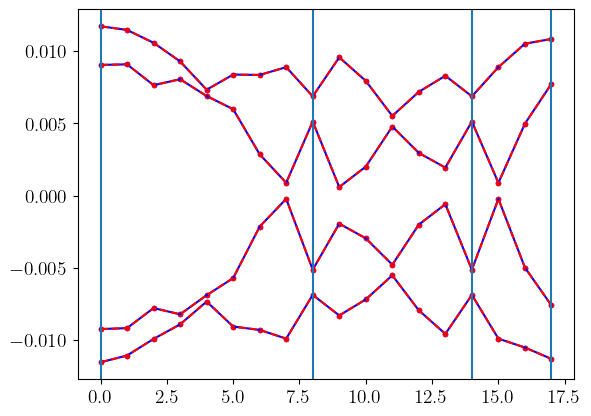

In [17]:
# draw_heatmap( 'kx', 'ky', 'dm0', 'dm1','dm2','dm3', 'dp0', 'dp1','dp2', 'dp3',data=df_disp)
draw_path( 'kx', 'ky', 'dm0', 'dm1','dm2','dm3', 'dp0', 'dp1','dp2', 'dp3',data=df_disp1)

In [18]:
# #For the c3 rotated Mpoints
# [KXc3z,KYc3z, Indc3z]=B1.latt.C3zLatt(d1,d2)
#     im=plt.scatter(d1,d2 ,c=d3[],s=50, cmap=color_map, marker='h')
#     im=plt.scatter(d1,d2 ,c=d3[Indc3z],s=25, cmap=color_map, marker='h')
#     im=plt.scatter(d1,d2 ,c=d3,s=10, cmap=color_map, marker='h')


def draw_path_c3(*args, **kwargs):
    data = kwargs.pop('data')
    d1 = np.array(data.loc[:,args[0]])
    d2 = np.array(data.loc[:,args[1]])
    d3 = np.array(data.loc[:,args[2]])
    d4 = np.array(data.loc[:,args[3]])
    d5 = np.array(data.loc[:,args[4]])
    d6 = np.array(data.loc[:,args[5]])
    d7 = np.array(data.loc[:,args[2]])
    d8 = np.array(data.loc[:,args[3]])
    d9 = np.array(data.loc[:,args[4]])
    d10 = np.array(data.loc[:,args[5]])
    
    [KXc3z,KYc3z, Indc3z]=B1.latt.C3zLatt(d1,d2)
    
    I3=np.array(Indc3z, dtype=int)
    I32=np.array(Indc3z[I3], dtype=int)
    
    [path,kpath,HSP_index]=B1.latt.embedded_High_symmetry_path(d1,d2)
    pth=np.arange(np.size(path))
    # plt.plot(d3[path], c='b')
    # plt.plot(d4[path], c='b')
    plt.scatter(pth,d3[path], c='b', s=9)
    plt.scatter(pth,d4[path], c='b', s=9)
    # plt.plot(d5[path], c='b')
    # plt.plot(d6[path], c='b')
    plt.scatter(pth,d5[path], c='b', s=9)
    plt.scatter(pth,d6[path], c='b', s=9)
    
    
    plt.plot(d7[path], ls='--', c='r')
    plt.plot(d8[path], ls='--', c='r')
    plt.scatter(pth,d7[path], c='r', s=9)
    plt.scatter(pth,d8[path], c='r', s=9)
    plt.plot(d9[path], ls='--', c='r')
    plt.plot(d10[path], ls='--', c='r')
    plt.scatter(pth,d9[path], c='r', s=9)
    plt.scatter(pth,d10[path], c='r', s=9)
    
    
    ###c3
    sc3=20
    col_c3_1='orange'
    col_c3_2='g'
    # plt.plot(d3[I3][path], c=col_c3_1)
    # plt.plot(d4[I3][path], c=col_c3_1)
    plt.scatter(pth,d3[I3][path], c=col_c3_1, s=sc3, marker='s')
    plt.scatter(pth,d4[I3][path], c=col_c3_1, s=sc3, marker='s')
    # plt.plot(d5[I3][path], c=col_c3_1)
    # plt.plot(d6[I3][path], c=col_c3_1)
    plt.scatter(pth,d5[I3][path], c=col_c3_1, s=sc3, marker='s')
    plt.scatter(pth,d6[I3][path], c=col_c3_1, s=sc3, marker='s')
    
    
    plt.plot(d7[I3][path], ls='--', c=col_c3_2)
    plt.plot(d8[I3][path], ls='--', c=col_c3_2)
    plt.scatter(pth,d7[I3][path], c=col_c3_2, s=sc3, marker='s')
    plt.scatter(pth,d8[I3][path], c=col_c3_2, s=sc3, marker='s')
    plt.plot(d9[I3][path], ls='--', c=col_c3_2)
    plt.plot(d10[I3][path], ls='--', c=col_c3_2)
    plt.scatter(pth,d9[I3][path], c=col_c3_2, s=sc3, marker='s')
    plt.scatter(pth,d10[I3][path], c=col_c3_2, s=sc3, marker='s')
    
    
    
    #c32
    sc32=15
    # plt.plot(d3[I32][path], c='b')
    # plt.plot(d4[I32][path], c='b')
    plt.scatter(pth,d3[I32][path], c='g', s=sc32, marker='^')
    plt.scatter(pth,d4[I32][path], c='g', s=sc32, marker='^')
    # plt.plot(d5[I32][path], c='b')
    # plt.plot(d6[I32][path], c='b')
    plt.scatter(pth,d5[I32][path], c='g', s=sc32, marker='^')
    plt.scatter(pth,d6[I32][path], c='g', s=sc32, marker='^')
    
    
    plt.plot(d7[I32][path], ls='--', c='k')
    plt.plot(d8[I32][path], ls='--', c='k')
    plt.scatter(pth,d7[I32][path], c='k', s=sc32, marker='^')
    plt.scatter(pth,d8[I32][path], c='k', s=sc32, marker='^')
    plt.plot(d9[I32][path], ls='--', c='k')
    plt.plot(d10[I32][path], ls='--', c='k')
    plt.scatter(pth,d9[I32][path], c='k', s=sc32, marker='^')
    plt.scatter(pth,d10[I32][path], c='k', s=sc32, marker='^')
    
    
    for ind in HSP_index:
        plt.axvline(ind)


    # plt.tricontourf(kx,ky ,d3,annot=True, **kwargs)


0.14433756729740632 0.24999999999999978


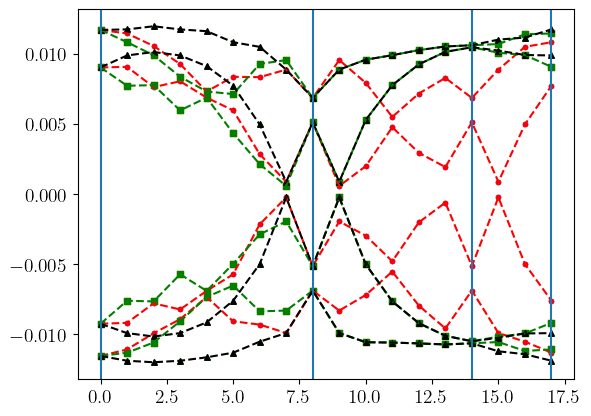

In [19]:
draw_path_c3( 'kx', 'ky', 'dm0', 'dm1','dm2','dm3', 'dp0', 'dp1','dp2', 'dp3',data=df_disp1)

0.14433756729740632 0.24999999999999978


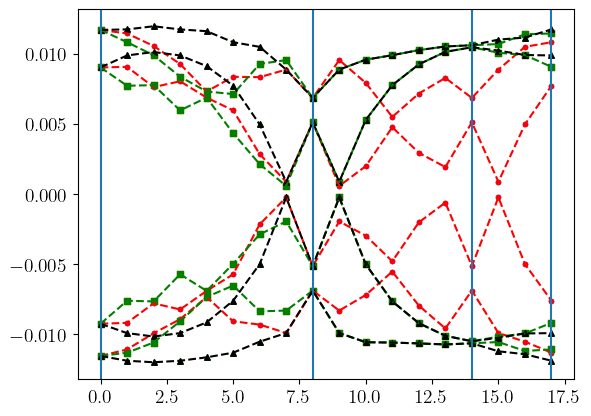

In [20]:
draw_path_c3( 'kx', 'ky', 'dm0', 'dm1','dm2','dm3', 'dp0', 'dp1','dp2', 'dp3',data=df_disp1)

In [21]:
from Eq_time_corrs_M_MF import Eq_time_corrs




In [22]:
fullpath=path_data+'/g3_12_2023-04-10-18-29-58/g3_12_1.05/data_mu_0_g2_3.pkl'
# Read the object from the pickle file
with open(fullpath, 'rb') as file:
    B1 = pickle.load(file)


In [23]:
trans_corr=Eq_time_corrs( B1, 'a', 'trans', dir='../data/g3_12_2023-04-10-18-29-58')

qq 0.07676251561000431
the shape of the index qpM array (72, 1042) compare to  72
the shape of the index qpM array (72, 1042) compare to  72
calculating tensor that stores the overlaps, layer 3, sublattice 1........
finsihed the overlaps.......... 3.3259222507476807
calculating tensor that stores the overlaps, layer 3, sublattice 2........
finsihed the overlaps.......... 2.188275098800659
calculating tensor that stores the overlaps, layer 3, sublattice 1........
finsihed the overlaps.......... 4.048986196517944
calculating tensor that stores the overlaps, layer 3, sublattice 2........
finsihed the overlaps.......... 2.367741107940674


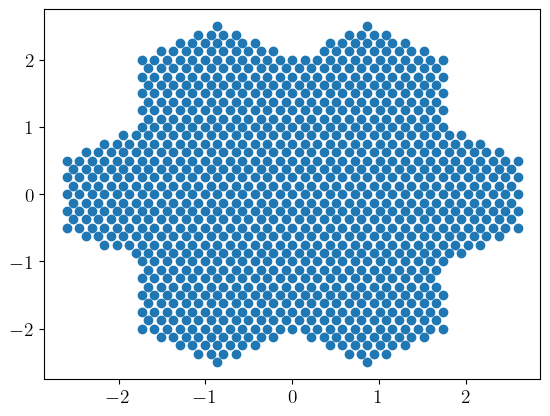

In [24]:
plt.scatter(B1.latt.KX,B1.latt.KY)

In [25]:
mu_values=np.array([0])
fillings=np.array([0])
TT=np.linspace(0.001,0.005,5)
for T in TT:
    res=trans_corr.Corr_eq(mu_values,fillings,T)



fillings and mu for the sweep....
 [0] [0]
no parallelization on filling
starting bubble.......
time for bubble... 5.8339080810546875
checking sizes of the arrays for hdf5 storage
1042 1042 1042 1042 1042 1042 1042 1042 1042 1042 1042 1042 1042 1
time for sweep delta 5.846456050872803
fillings and mu for the sweep....
 [0] [0]
no parallelization on filling
starting bubble.......
time for bubble... 5.842445135116577
checking sizes of the arrays for hdf5 storage
1042 1042 1042 1042 1042 1042 1042 1042 1042 1042 1042 1042 1042 1
time for sweep delta 5.849307060241699
fillings and mu for the sweep....
 [0] [0]
no parallelization on filling
starting bubble.......
time for bubble... 5.897516965866089
checking sizes of the arrays for hdf5 storage
1042 1042 1042 1042 1042 1042 1042 1042 1042 1042 1042 1042 1042 1
time for sweep delta 5.904328107833862
fillings and mu for the sweep....
 [0] [0]
no parallelization on filling
starting bubble.......
time for bubble... 5.817923069000244
checking si

In [26]:
pat='/Users/juanmendezvalderrama/Documents/Proyectos/Moire_TBG_phonons/BM_bandstructure/data/g3_12_2023-04-10-18-29-58'
df_correq=pd.read_hdf(pat+'/corr_eq12_mode_trans_symmetry_a_alpha_0.0_beta_0.15549872686414076_umklp_1_kappa_0.75_theta_0.01832595714594046_modeHF_0_nu_0_T_0.001.h5')

In [27]:
df_correq

,bub,kx,ky,nu,mu,theta,kappa,Em1,Em2,Ep1,Ep2,T
0,354.241925,-1.732051,-2.000,0,0,0.018326,0.75,-2.334183e-12,2.334438e-12,-2.334050e-12,2.334435e-12,0.001
1,201.180231,-1.515544,-2.125,0,0,0.018326,0.75,-5.047268e-05,5.047268e-05,-5.047268e-05,5.047268e-05,0.001
2,302.148952,-1.587713,-2.000,0,0,0.018326,0.75,-2.827957e-05,3.993174e-05,-3.993174e-05,2.827957e-05,0.001
3,113.864455,-1.299038,-2.250,0,0,0.018326,0.75,-7.234893e-05,7.234892e-05,-7.234892e-05,7.234893e-05,0.001
4,430.924288,-1.659882,-1.875,0,0,0.018326,0.75,-3.993174e-05,2.827957e-05,-2.827957e-05,3.993174e-05,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...
1037,430.924288,1.659882,1.875,0,0,0.018326,0.75,-2.827957e-05,3.993174e-05,-3.993174e-05,2.827957e-05,0.001
1038,113.864455,1.299038,2.250,0,0,0.018326,0.75,-7.234893e-05,7.234892e-05,-7.234892e-05,7.234893e-05,0.001
1039,302.148952,1.587713,2.000,0,0,0.018326,0.75,-3.993174e-05,2.827957e-05,-2.827957e-05,3.993174e-05,0.001
1040,201.180231,1.515544,2.125,0,0,0.018326,0.75,-5.047268e-05,5.047268e-05,-5.047268e-05,5.047268e-05,0.001


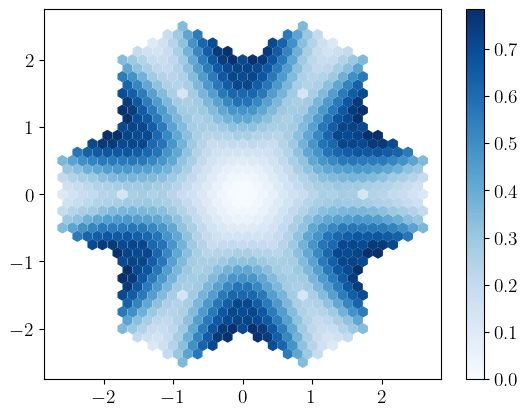

In [28]:
plt.scatter(df_correq['kx'],df_correq['ky'], c=df_correq['bub']*df_correq['T'], marker='h', s=50, cmap='Blues')
plt.colorbar()

In [29]:
phiT=np.array(dff3['D'])[-1]
T=0.1
res=trans_corr.MF_corr_eq((0,T,phiT))

starting bubble.......
time for bubble... 6.499112844467163


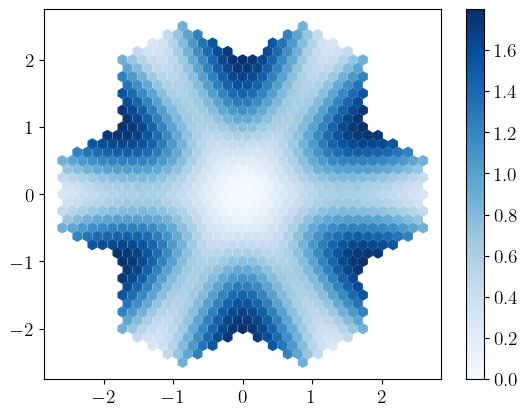

: 

In [30]:
plt.scatter(df_correq['kx'],df_correq['ky'], c=res, marker='h', s=50, cmap='Blues')
plt.colorbar()